# Cancer Dataset (Linear Regression Model)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm

In [2]:
# Loading Dataset:
data = pd.read_csv('cancer_reg.csv',encoding="ISO-8859-1")
data.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [3]:
# Data Preprocessing:

In [4]:
data.dtypes

avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite            

In [5]:
# finding Null values:
data.isnull().sum() / len(data) *100

avgAnnCount                 0.000000
avgDeathsPerYear            0.000000
TARGET_deathRate            0.000000
incidenceRate               0.000000
medIncome                   0.000000
popEst2015                  0.000000
povertyPercent              0.000000
studyPerCap                 0.000000
binnedInc                   0.000000
MedianAge                   0.000000
MedianAgeMale               0.000000
MedianAgeFemale             0.000000
Geography                   0.000000
AvgHouseholdSize            0.000000
PercentMarried              0.000000
PctNoHS18_24                0.000000
PctHS18_24                  0.000000
PctSomeCol18_24            74.991795
PctBachDeg18_24             0.000000
PctHS25_Over                0.000000
PctBachDeg25_Over           0.000000
PctEmployed16_Over          4.988513
PctUnemployed16_Over        0.000000
PctPrivateCoverage          0.000000
PctPrivateCoverageAlone    19.986872
PctEmpPrivCoverage          0.000000
PctPublicCoverage           0.000000
P

In [6]:
# Inference:

# "PctSomeCol18_24" - null value % is approximately 75. i.e more than half of the data is missing. so we can drop the column.
# Other two "PctEmployed16_Over", "PctPrivateCoverageAlone" has low null values. so we can impute by using KNNImputer

In [7]:
data.drop('PctSomeCol18_24',axis = 1,inplace = True)

In [8]:
# Before imputing null values, "binnedInc" is in object. Convert it to int by removing '()','[]'.

In [9]:
data['binnedInc']

0        (61494.5, 125635]
1       (48021.6, 51046.4]
2       (48021.6, 51046.4]
3         (42724.4, 45201]
4       (48021.6, 51046.4]
               ...        
3042      (45201, 48021.6]
3043    (48021.6, 51046.4]
3044    (51046.4, 54545.6]
3045    (48021.6, 51046.4]
3046    (40362.7, 42724.4]
Name: binnedInc, Length: 3047, dtype: object

In [10]:
a = data['binnedInc'].str.split(',')
a

0        [(61494.5,  125635]]
1       [(48021.6,  51046.4]]
2       [(48021.6,  51046.4]]
3         [(42724.4,  45201]]
4       [(48021.6,  51046.4]]
                ...          
3042      [(45201,  48021.6]]
3043    [(48021.6,  51046.4]]
3044    [(51046.4,  54545.6]]
3045    [(48021.6,  51046.4]]
3046    [(40362.7,  42724.4]]
Name: binnedInc, Length: 3047, dtype: object

In [11]:
lst = []
for i in a:
    if '(' in i[0]:
        i[0] = i[0].replace('(','')
    if ')' in i[1]:
        i[1] = i[1].replace(')','')
    if '[' in i[0]:
        i[0] = i[0].replace('[','')
    if ']' in i[1]:
        i[1] = i[1].replace(']','')
        

In [12]:
for j in a:
    lst.append((float(j[0]) + float(j[1]))/2)
    
data['binnedInc'] = lst

In [13]:
# Changing index:
data.set_index('Geography',inplace = True)

In [14]:
data.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
Geography,,,,,,,,,,,,,,,,,,,,,
"Kitsap County, Washington",1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,93564.75,39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
"Kittitas County, Washington",173.0,70,161.3,411.6,48127,43269,18.6,23.111234,49534.00,33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
"Klickitat County, Washington",102.0,50,174.7,349.7,49348,21026,14.6,47.560164,49534.00,45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
"Lewis County, Washington",427.0,202,194.8,430.4,44243,75882,17.1,342.637253,43962.70,42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
"Lincoln County, Washington",57.0,26,144.4,350.1,49955,10321,12.5,0.000000,49534.00,48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [15]:
# Null value imputation:

In [16]:
from sklearn.impute import KNNImputer

In [17]:
impu = KNNImputer()
d1 = impu.fit_transform(data)

d1 = pd.DataFrame(d1,columns = data.columns, index = data.index)

In [18]:
d1.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
Geography,,,,,,,,,,,,,,,,,,,,,
"Kitsap County, Washington",1397.0,469.0,164.9,489.8,61898.0,260131.0,11.2,499.748204,93564.75,39.3,...,59.32,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
"Kittitas County, Washington",173.0,70.0,161.3,411.6,48127.0,43269.0,18.6,23.111234,49534.00,33.0,...,53.80,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
"Klickitat County, Washington",102.0,50.0,174.7,349.7,49348.0,21026.0,14.6,47.560164,49534.00,45.0,...,43.50,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
"Lewis County, Washington",427.0,202.0,194.8,430.4,44243.0,75882.0,17.1,342.637253,43962.70,42.8,...,40.30,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
"Lincoln County, Washington",57.0,26.0,144.4,350.1,49955.0,10321.0,12.5,0.000000,49534.00,48.3,...,43.90,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


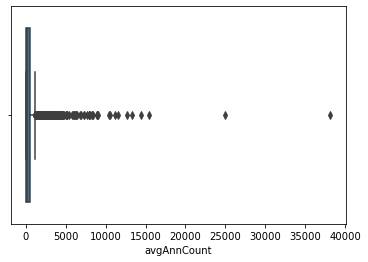

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


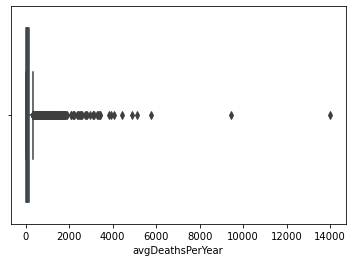

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


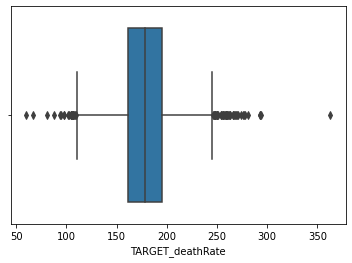

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


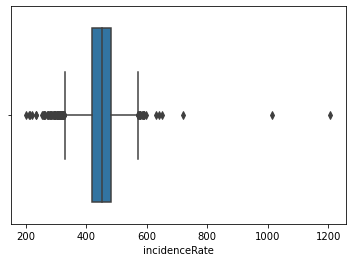

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


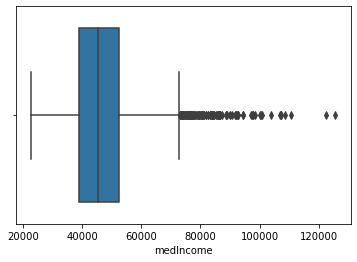

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


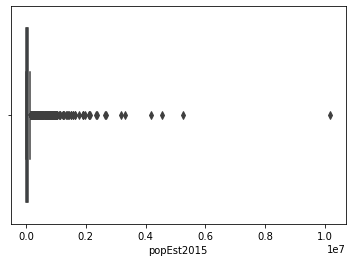

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


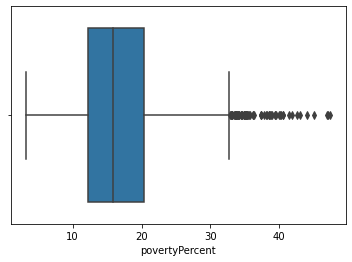

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


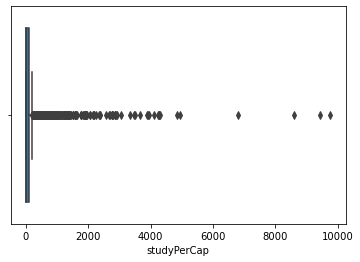

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


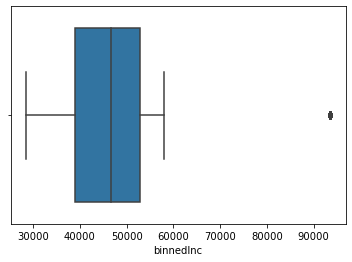

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


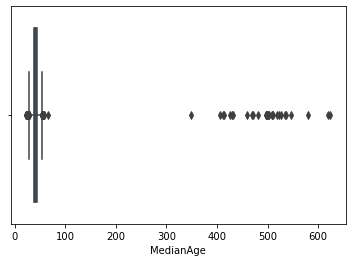

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


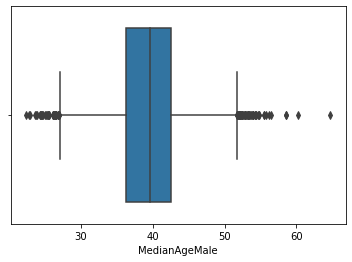

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


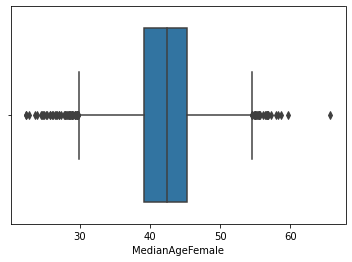

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


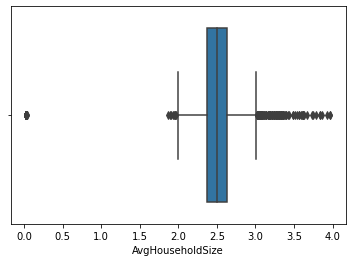

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


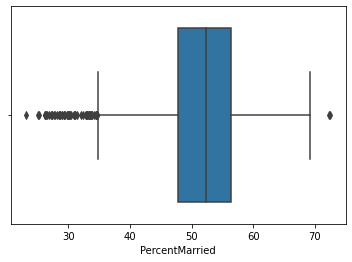

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


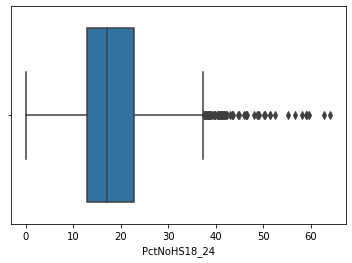

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


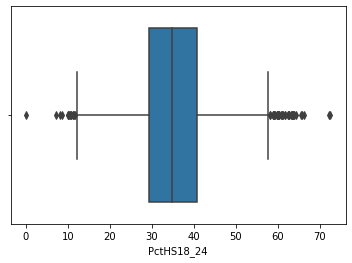

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


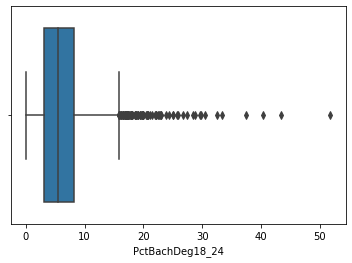

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


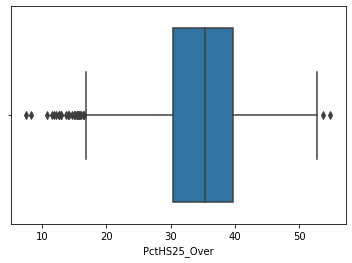

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


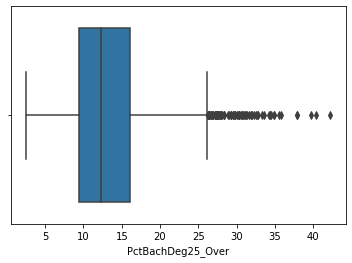

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


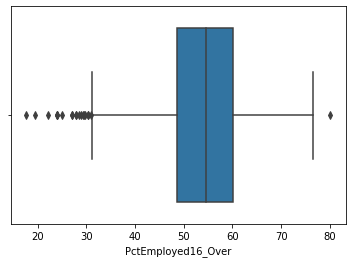

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


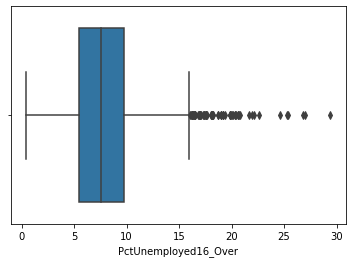

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


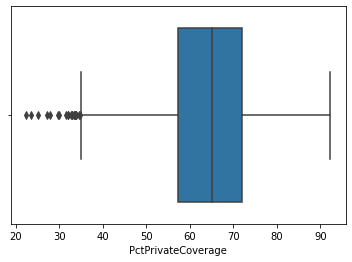

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


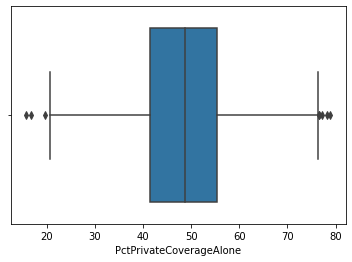

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


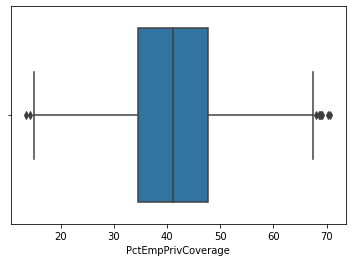

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


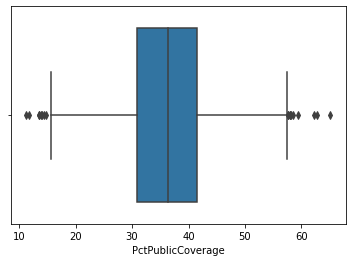

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


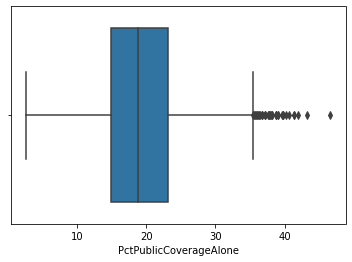

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


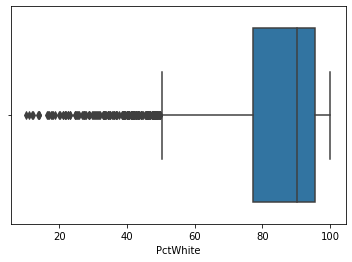

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


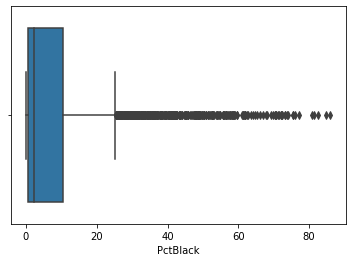

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


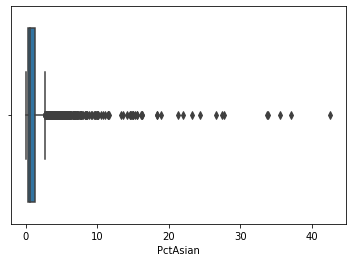

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


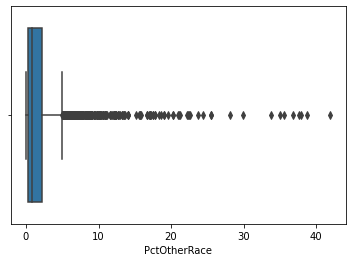

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


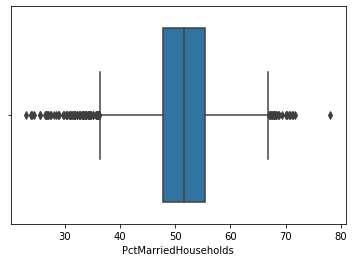

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


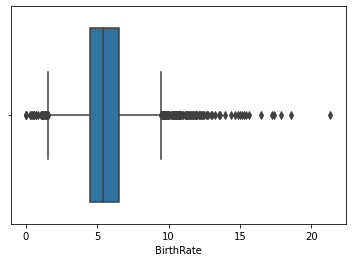

In [19]:
# Check for outliers:

for i in d1.columns:
    sns.boxplot(d1[i])
    plt.show()

In [20]:
# Inference: From the above box plot we can infere that, outliers are present in each feature given in the dataset, will lead to  
# poor model performance. To avoid this we can do Outlier treatment by capping.

In [21]:
# Capping:

for i in d1.columns:
    q1 = d1[i].quantile(0.25)
    q3 = d1[i].quantile(0.75)
    iqr = q3 - q1
    ub = q3 + 1.5*iqr
    lb = q1 - 1.5*iqr
    uc = d1[i].quantile(0.99)
    lc = d1[i].quantile(0.01)
    
    for j in d1[i].index:
        if d1.loc[j,i] > ub:
            d1.loc[j,i] = uc
        if d1.loc[j,i] < lb:
            d1.loc[j,i] = lc

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


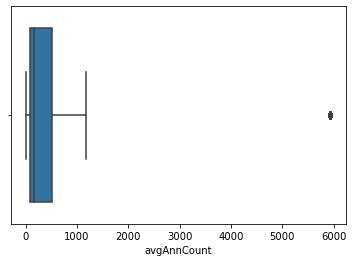

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


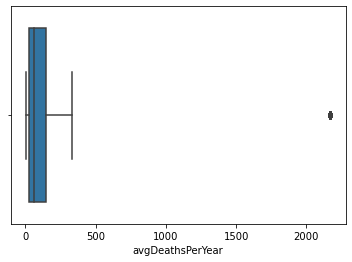

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


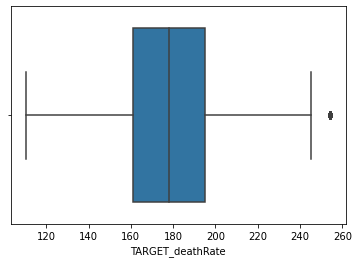

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


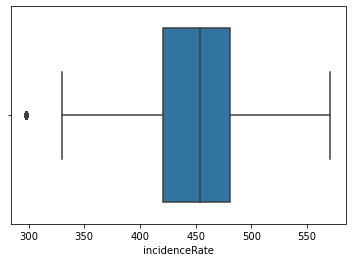

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


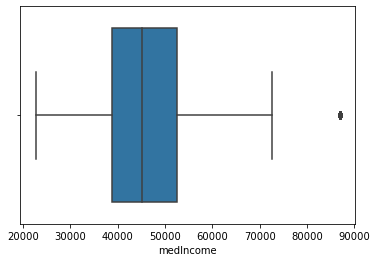

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


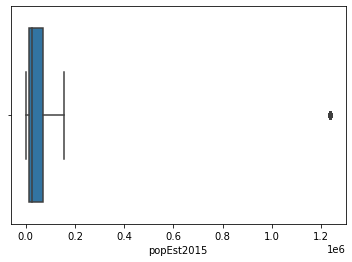

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


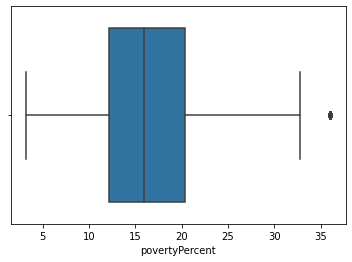

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


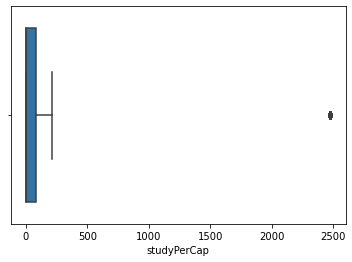

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


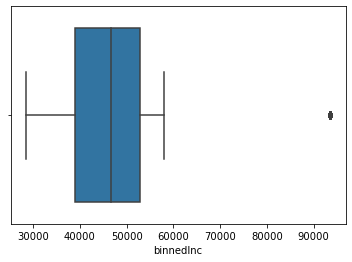

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


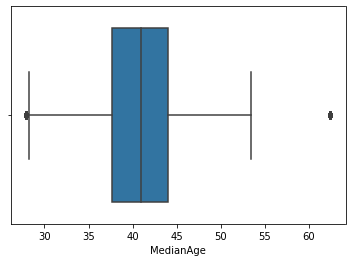

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


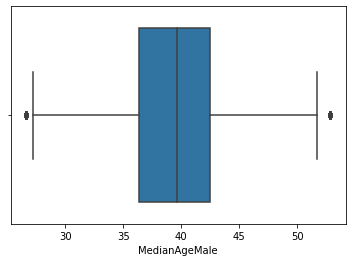

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


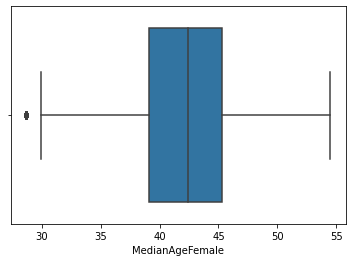

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


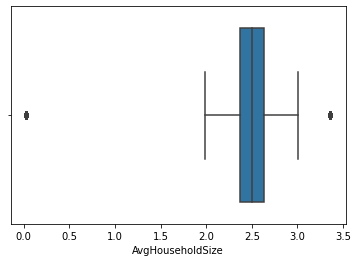

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


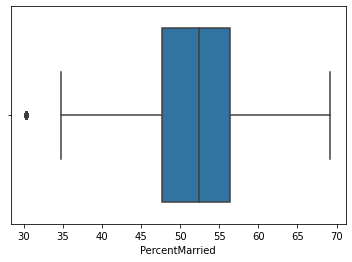

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


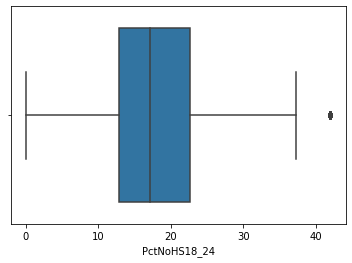

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


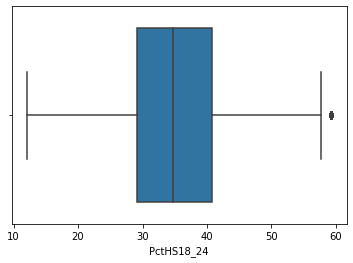

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


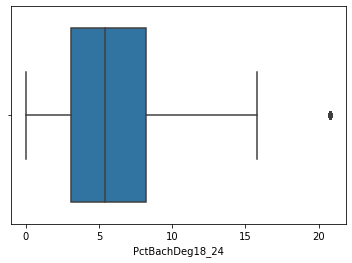

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


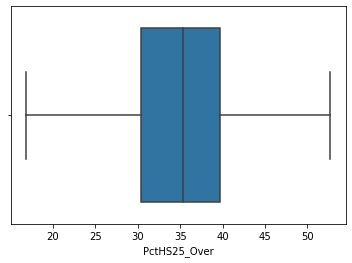

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


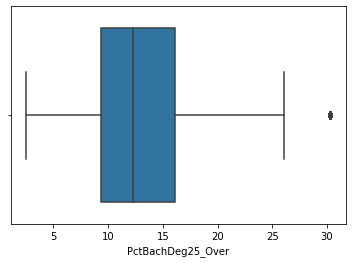

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


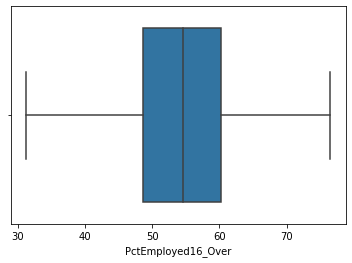

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


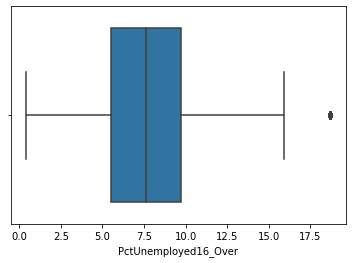

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


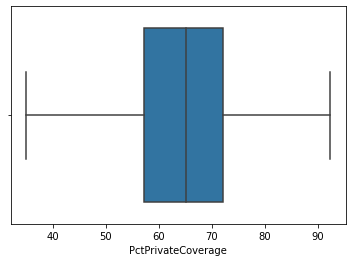

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


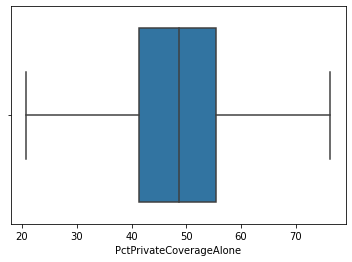

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


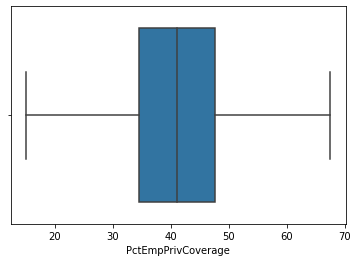

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


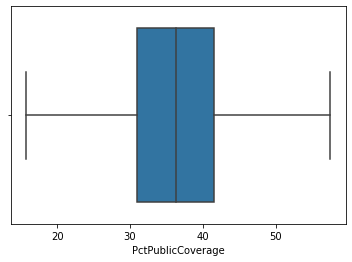

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


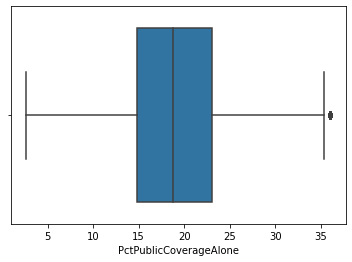

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


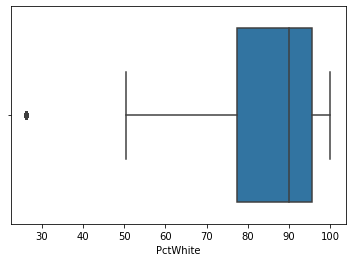

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


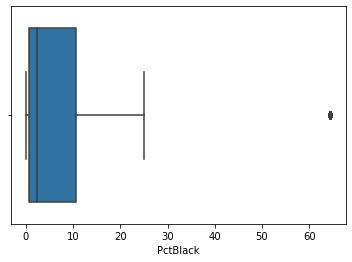

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


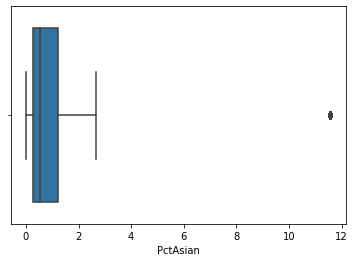

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


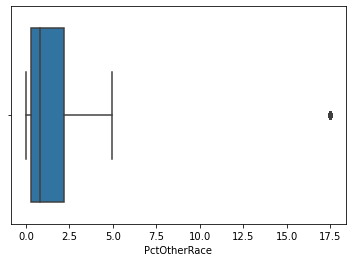

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


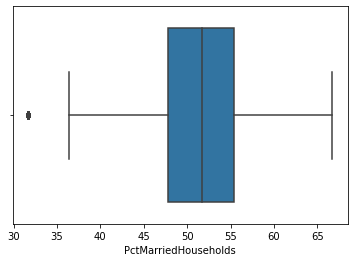

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


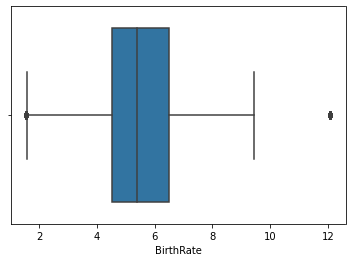

In [22]:
# Recheck for outlier:

for i in d1.columns:
    sns.boxplot(d1[i])
    plt.show()

In [23]:
# Building OLS model:

inp = d1.drop('TARGET_deathRate',axis = 1)
out = d1['TARGET_deathRate']

inpc = sm.add_constant(inp)

ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TARGET_deathRate   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     104.8
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:25:52   Log-Likelihood:                -13240.
No. Observations:                3047   AIC:                         2.654e+04
Df Residuals:                    3015   BIC:                         2.674e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     167.0968     15.061     11.095      0.000     137.566     196.628
avgAnnCount                -0.0007      0.000     -3.086      0.002      -0.001      -0.000
avgDeathsPerYear            0.0012      0.001      0.964      0.335      -0.001       0.004
incidenceRate               0.2000      0.008     26.381      0.000       0.185       0.215
medIncome                4.951e-05      0.000      0.470      0.638      -0.000       0.000
popEst2015              -1.319e-06   1.97e-06     -0.670      0.503   -5.18e-06    2.54e-06
povertyPercent              0.2313      0.158      1.463      0.144      -0.079       0.541
studyPerCap                -0.0002      0.000     -0.499      0.618      -0.001       0.001
binnedInc                  3.3e-05    5.9e-05      0.559      0.576   -8.27e-05       0.000
MedianAge                  -0.1010      0.147     -0.685      0.493      -0.390       0.188
MedianAgeMale              -0.3880      0.224     -1.733      0.083      -0.827       0.051
MedianAgeFemale            -0.1564      0.222     -0.706      0.480      -0.591       0.278
AvgHouseholdSize           -0.0959      0.889     -0.108      0.914      -1.839       1.647
PercentMarried              0.9905      0.158      6.254      0.000       0.680       1.301
PctNoHS18_24               -0.1283      0.056     -2.300      0.022      -0.238      -0.019
PctHS18_24                  0.2351      0.049      4.831      0.000       0.140       0.330
PctBachDeg18_24            -0.0862      0.110     -0.782      0.434      -0.302       0.130
PctHS25_Over                0.4489      0.094      4.752      0.000       0.264       0.634
PctBachDeg25_Over          -0.9304      0.151     -6.149      0.000      -1.227      -0.634
PctEmployed16_Over         -0.5104      0.105     -4.877      0.000      -0.716      -0.305
PctUnemployed16_Over        0.2449      0.165      1.480      0.139      -0.079       0.569
PctPrivateCoverage         -0.6275      0.147     -4.257      0.000      -0.917      -0.339
PctPrivateCoverageAlone     0.0256      0.123      0.208      0.835      -0.216       0.267
PctEmpPrivCoverage          0.3449      0.101      3.406      0.001       0.146       0.543
PctPublicCoverage          -0.1049      0.225     -0.466      0.641      -0.546       0.336
PctPublicCoverageAlone      0.0668      0.280      0.239      0.811      -0.482       0.615
PctWhite                   -0.0153      0.039     -0.392      0.695      -0.092       0.061
PctBlack                    0.0211      0.028      0.741      0.459      -0.035       0.077
PctAsian                    0.1218      0.144      0.848      0.397      -0.160       0.403
PctOtherRace               -0.5671      0.084     -6.765      0.000      -0.731      -0.403
PctMarriedHouseholds       -1.1541      0.154  

In [24]:
# OLS Model inference:

# From the above model summary we can find R-square value is 51.9%, Adj-R-Square is 51.4%

# p value of Fstat is < 0.05, therefore we can conclude that overall model is significant

# some of the input feature has the probability of tstat value < 0.05. and some have > 0.05. i.e some features have correlated with each other.

# To build a final OLS model using Linear Regression with improved R-Square value, need to check 5 Assumptions which are follows:
# 1. Multicollinearity
# 2. Normality
# 3. Linearity
# 4. Auto-correlation
# 5. Homoscadacity

In [25]:
# Assumption 1 : Check for multi-collinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
# Before finding VIF, partial scaling to be done on input features:

inp1 = inp - inp.mean()

In [27]:
# Building OLS model based on partial scaled input:

inp1c = sm.add_constant(inp1)

ols = sm.OLS(out,inp1c)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TARGET_deathRate   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     104.8
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:25:52   Log-Likelihood:                -13240.
No. Observations:                3047   AIC:                         2.654e+04
Df Residuals:                    3015   BIC:                         2.674e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     178.6351      0.340    525.603      0.000     177.969     179.301
avgAnnCount                -0.0007      0.000     -3.086      0.002      -0.001      -0.000
avgDeathsPerYear            0.0012      0.001      0.964      0.335      -0.001       0.004
incidenceRate               0.2000      0.008     26.381      0.000       0.185       0.215
medIncome                4.951e-05      0.000      0.470      0.638      -0.000       0.000
popEst2015              -1.319e-06   1.97e-06     -0.670      0.503   -5.18e-06    2.54e-06
povertyPercent              0.2313      0.158      1.463      0.144      -0.079       0.541
studyPerCap                -0.0002      0.000     -0.499      0.618      -0.001       0.001
binnedInc                  3.3e-05    5.9e-05      0.559      0.576   -8.27e-05       0.000
MedianAge                  -0.1010      0.147     -0.685      0.493      -0.390       0.188
MedianAgeMale              -0.3880      0.224     -1.733      0.083      -0.827       0.051
MedianAgeFemale            -0.1564      0.222     -0.706      0.480      -0.591       0.278
AvgHouseholdSize           -0.0959      0.889     -0.108      0.914      -1.839       1.647
PercentMarried              0.9905      0.158      6.254      0.000       0.680       1.301
PctNoHS18_24               -0.1283      0.056     -2.300      0.022      -0.238      -0.019
PctHS18_24                  0.2351      0.049      4.831      0.000       0.140       0.330
PctBachDeg18_24            -0.0862      0.110     -0.782      0.434      -0.302       0.130
PctHS25_Over                0.4489      0.094      4.752      0.000       0.264       0.634
PctBachDeg25_Over          -0.9304      0.151     -6.149      0.000      -1.227      -0.634
PctEmployed16_Over         -0.5104      0.105     -4.877      0.000      -0.716      -0.305
PctUnemployed16_Over        0.2449      0.165      1.480      0.139      -0.079       0.569
PctPrivateCoverage         -0.6275      0.147     -4.257      0.000      -0.917      -0.339
PctPrivateCoverageAlone     0.0256      0.123      0.208      0.835      -0.216       0.267
PctEmpPrivCoverage          0.3449      0.101      3.406      0.001       0.146       0.543
PctPublicCoverage          -0.1049      0.225     -0.466      0.641      -0.546       0.336
PctPublicCoverageAlone      0.0668      0.280      0.239      0.811      -0.482       0.615
PctWhite                   -0.0153      0.039     -0.392      0.695      -0.092       0.061
PctBlack                    0.0211      0.028      0.741      0.459      -0.035       0.077
PctAsian                    0.1218      0.144      0.848      0.397      -0.160       0.403
PctOtherRace               -0.5671      0.084     -6.765      0.000      -0.731      -0.403
PctMarriedHouseholds       -1.1541      0.154  

In [28]:
# To check VIF:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inp1c.values,i) for i in range(inp1c.shape[1])]
vif['Features'] =  inp1c.columns
vif.sort_values('VIF', ascending = False)

,VIF,Features
24,26.313135,PctPublicCoverage
25,24.576815,PctPublicCoverageAlone
21,20.884417,PctPrivateCoverage
4,14.453400,medIncome
22,12.359664,PctPrivateCoverageAlone
10,11.410267,MedianAgeMale
11,11.381291,MedianAgeFemale
13,10.341413,PercentMarried
6,8.645183,povertyPercent
8,8.590273,binnedInc


In [29]:
# In the above DataFrame, "PctPublicCoverage" has the high VIF value of 26.313135, which is greater than 5. so we can drop it.

In [30]:
inp_v1 = inp1.drop('PctPublicCoverage',axis = 1)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inp_v1.values,i) for i in range(inp_v1.shape[1])]
vif['Features'] =  inp_v1.columns
vif.sort_values('VIF', ascending = False)

,VIF,Features
20,15.456594,PctPrivateCoverage
3,14.419613,medIncome
9,11.241180,MedianAgeMale
21,11.168776,PctPrivateCoverageAlone
10,10.648702,MedianAgeFemale
12,10.306192,PercentMarried
5,8.636587,povertyPercent
7,8.587817,binnedInc
28,8.412892,PctMarriedHouseholds
22,7.108430,PctEmpPrivCoverage


In [31]:
# In the above DataFrame, "PctPrivateCoverage" has the high VIF value of 15.456594 , which is greater than 5. so we can drop it.

In [32]:
inp_v2 = inp_v1.drop('PctPrivateCoverage', axis = 1)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inp_v2.values,i) for i in range(inp_v2.shape[1])]
vif['Features'] =  inp_v2.columns
vif.sort_values('VIF', ascending = False)

,VIF,Features
3,14.416115,medIncome
9,11.234458,MedianAgeMale
10,10.286323,MedianAgeFemale
12,10.284574,PercentMarried
20,9.109141,PctPrivateCoverageAlone
7,8.538722,binnedInc
27,8.402642,PctMarriedHouseholds
5,8.317033,povertyPercent
21,6.473730,PctEmpPrivCoverage
8,6.171889,MedianAge


In [33]:
# In the above DataFrame, "medIncome" has the high VIF value of 14.416115, which is greater than 5. so we can drop it.

In [34]:
inp_v3 = inp_v2.drop('medIncome', axis = 1)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inp_v3.values,i) for i in range(inp_v3.shape[1])]
vif['Features'] =  inp_v3.columns
vif.sort_values('VIF', ascending = False)

,VIF,Features
8,11.184806,MedianAgeMale
9,10.285249,MedianAgeFemale
11,10.106532,PercentMarried
19,9.093152,PctPrivateCoverageAlone
26,8.091302,PctMarriedHouseholds
4,7.371939,povertyPercent
20,6.324503,PctEmpPrivCoverage
7,6.159582,MedianAge
1,5.896293,avgDeathsPerYear
17,5.772686,PctEmployed16_Over


In [35]:
# In the above DataFrame, "MedianAgeMale" has the high VIF value of 11.18480 , which is greater than 5. so we can drop it.

In [36]:
inp_v4 = inp_v3.drop('MedianAgeMale', axis = 1)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inp_v4.values,i) for i in range(inp_v4.shape[1])]
vif['Features'] =  inp_v4.columns
vif.sort_values('VIF', ascending = False)

,VIF,Features
10,9.791024,PercentMarried
18,9.070059,PctPrivateCoverageAlone
25,7.991729,PctMarriedHouseholds
4,7.332659,povertyPercent
8,6.496349,MedianAgeFemale
19,6.324066,PctEmpPrivCoverage
1,5.896107,avgDeathsPerYear
16,5.772459,PctEmployed16_Over
3,5.708016,popEst2015
15,5.500507,PctBachDeg25_Over


In [37]:
# In the above DataFrame, "PercentMarried" has the high VIF value of 9.791024 , which is greater than 5. so we can drop it.

In [38]:
inp_v5 = inp_v4.drop('PercentMarried', axis = 1)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inp_v5.values,i) for i in range(inp_v5.shape[1])]
vif['Features'] =  inp_v5.columns
vif.sort_values('VIF', ascending = False)

,VIF,Features
17,9.037472,PctPrivateCoverageAlone
4,7.306624,povertyPercent
8,6.322111,MedianAgeFemale
18,6.115765,PctEmpPrivCoverage
1,5.893770,avgDeathsPerYear
3,5.708001,popEst2015
14,5.485594,PctBachDeg25_Over
7,5.117783,MedianAge
19,4.888193,PctPublicCoverageAlone
15,4.539647,PctEmployed16_Over


In [39]:
# In the above DataFrame, "PctPrivateCoverageAlone" has the high VIF value of 9.037472 , which is greater than 5. so we can drop it.

In [40]:
inp_v6 = inp_v5.drop('PctPrivateCoverageAlone', axis = 1)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inp_v6.values,i) for i in range(inp_v6.shape[1])]
vif['Features'] =  inp_v6.columns
vif.sort_values('VIF', ascending = False)

,VIF,Features
4,7.228003,povertyPercent
8,6.307765,MedianAgeFemale
1,5.884737,avgDeathsPerYear
3,5.706362,popEst2015
14,5.415139,PctBachDeg25_Over
7,5.117432,MedianAge
15,4.515723,PctEmployed16_Over
18,4.440892,PctPublicCoverageAlone
17,4.247551,PctEmpPrivCoverage
19,4.124981,PctWhite


In [41]:
# In the above DataFrame, "povertyPercent" has the high VIF value of 7.228003 , which is greater than 5. so we can drop it.

In [42]:
inp_v7 = inp_v6.drop('povertyPercent', axis = 1)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inp_v7.values,i) for i in range(inp_v7.shape[1])]
vif['Features'] =  inp_v7.columns
vif.sort_values('VIF', ascending = False)

,VIF,Features
7,6.033920,MedianAgeFemale
1,5.871807,avgDeathsPerYear
3,5.706350,popEst2015
13,5.413630,PctBachDeg25_Over
6,5.096044,MedianAge
16,4.183032,PctEmpPrivCoverage
18,4.109145,PctWhite
17,3.967186,PctPublicCoverageAlone
14,3.779993,PctEmployed16_Over
12,3.630529,PctHS25_Over


In [43]:
# In the above DataFrame, "MedianAgeFemale" has the high VIF value of 6.033920 , which is greater than 5. so we can drop it.

In [44]:
inp_v8 = inp_v7.drop('MedianAgeFemale', axis = 1)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inp_v8.values,i) for i in range(inp_v8.shape[1])]
vif['Features'] =  inp_v8.columns
vif.sort_values('VIF', ascending = False)

,VIF,Features
1,5.846406,avgDeathsPerYear
3,5.678318,popEst2015
12,5.399163,PctBachDeg25_Over
15,4.148960,PctEmpPrivCoverage
17,4.084611,PctWhite
16,3.966824,PctPublicCoverageAlone
13,3.643743,PctEmployed16_Over
11,3.595931,PctHS25_Over
5,3.533295,binnedInc
18,2.944497,PctBlack


In [45]:
# In the above DataFrame, "avgDeathsPerYear" has the high VIF value of 5.846406 , which is greater than 5. so we can drop it.

In [46]:
inp_v9 = inp_v8.drop('avgDeathsPerYear', axis = 1)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inp_v9.values,i) for i in range(inp_v9.shape[1])]
vif['Features'] =  inp_v9.columns
vif.sort_values('VIF', ascending = False)

,VIF,Features
11,5.395662,PctBachDeg25_Over
14,4.148492,PctEmpPrivCoverage
16,4.083974,PctWhite
15,3.957419,PctPublicCoverageAlone
12,3.635772,PctEmployed16_Over
10,3.585306,PctHS25_Over
4,3.518434,binnedInc
17,2.944487,PctBlack
13,2.629325,PctUnemployed16_Over
20,2.548065,PctMarriedHouseholds


In [47]:
# In the above DataFrame, "PctBachDeg25_Over" has the high VIF value of 5.395662 , which is greater than 5. so we can drop it.

In [48]:
inp_v10 = inp_v9.drop('PctBachDeg25_Over', axis = 1)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inp_v10.values,i) for i in range(inp_v10.shape[1])]
vif['Features'] =  inp_v10.columns
vif.sort_values('VIF', ascending = False)

,VIF,Features
13,4.148398,PctEmpPrivCoverage
15,4.074204,PctWhite
14,3.828009,PctPublicCoverageAlone
11,3.558229,PctEmployed16_Over
4,3.402547,binnedInc
16,2.930270,PctBlack
12,2.602023,PctUnemployed16_Over
19,2.518304,PctMarriedHouseholds
10,2.315857,PctHS25_Over
2,2.222823,popEst2015


In [49]:
# Above listed input features has statisfied multicollinearity effect. Rebuilding the model with the above features

In [50]:
inpc = sm.add_constant(inp_v10)

ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TARGET_deathRate   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     141.5
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:26:00   Log-Likelihood:                -13312.
No. Observations:                3047   AIC:                         2.667e+04
Df Residuals:                    3025   BIC:                         2.680e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    178.6351      0.347    514.283      0.000     177.954     179.316
avgAnnCount               -0.0007      0.000     -3.365      0.001      -0.001      -0.000
incidenceRate              0.2005      0.008     26.331      0.000       0.186       0.215
popEst2015             -5.143e-07   1.25e-06     -0.410      0.682   -2.97e-06    1.95e-06
studyPerCap               -0.0005      0.000     -1.224      0.221      -0.001       0.000
binnedInc              -4.684e-05   3.79e-05     -1.234      0.217      -0.000    2.76e-05
MedianAge                 -0.5538      0.079     -7.053      0.000      -0.708      -0.400
AvgHouseholdSize           0.0712      0.881      0.081      0.936      -1.656       1.798
PctNoHS18_24              -0.0006      0.054     -0.010      0.992      -0.107       0.105
PctHS18_24                 0.2952      0.048      6.121      0.000       0.201       0.390
PctBachDeg18_24           -0.2883      0.109     -2.654      0.008      -0.501      -0.075
PctHS25_Over               0.7392      0.076      9.714      0.000       0.590       0.888
PctEmployed16_Over        -0.2971      0.081     -3.678      0.000      -0.455      -0.139
PctUnemployed16_Over       0.4934      0.165      2.994      0.003       0.170       0.817
PctEmpPrivCoverage         0.0024      0.075      0.032      0.975      -0.145       0.150
PctPublicCoverageAlone     0.6947      0.113      6.157      0.000       0.473       0.916
PctWhite                   0.0018      0.039      0.045      0.964      -0.074       0.078
PctBlack                   0.0311      0.028      1.093      0.275      -0.025       0.087
PctAsian                   0.0437      0.145      0.302      0.763      -0.240       0.328
PctOtherRace              -0.4236      0.082     -5.144      0.000      -0.585      -0.262
PctMarriedHouseholds      -0.3901      0.085     -4.585      0.000      -0.557      -0.223
BirthRate                 -0.4849      0.184     -2.632      0.009      -0.846      -0.124
==============================================================================
Omnibus:                       90.945   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.163
Skew:                           0.169   Prob(JB):                     6.89e-43
Kurtosis:                       4.190   Cond. No.                     1.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
# 2. Check for normality:
# To find the residue:

ols_mod.resid.skew()

# Skewness is within the acceptable range of -0.5 to 0.5

0.16912592557252024

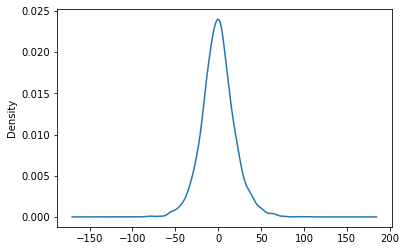

In [52]:
# To check the distribution of normality:

ols_mod.resid.plot(kind = 'density')
plt.show()

# From the below graph we can conclude that data is normally distributed

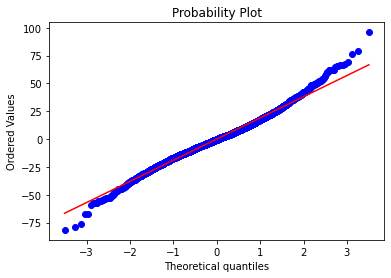

In [53]:
# To check normality with probability plot:
stats.probplot(ols_mod.resid, plot = plt)
plt.show()

In [54]:
# In the above probability plot, data points are distributed in the straight line. 
# so we can conclude that data is normally distributed

In [55]:
# 3. Check for Linearity:

from statsmodels.stats.diagnostic import linear_rainbow

In [56]:
linear_rainbow(res = ols_mod, frac = 0.5)

# Inference:
# Pvalue > 0.05. Null hypothesis is accepted, part of data is accepted. Model is statisfying the linearity condition. 

(1.0810490090842706, 0.06493007963161607)

In [57]:
# 4. Check for Multicollinearity:

ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TARGET_deathRate   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     141.5
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:26:02   Log-Likelihood:                -13312.
No. Observations:                3047   AIC:                         2.667e+04
Df Residuals:                    3025   BIC:                         2.680e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    178.6351      0.347    514.283      0.000     177.954     179.316
avgAnnCount               -0.0007      0.000     -3.365      0.001      -0.001      -0.000
incidenceRate              0.2005      0.008     26.331      0.000       0.186       0.215
popEst2015             -5.143e-07   1.25e-06     -0.410      0.682   -2.97e-06    1.95e-06
studyPerCap               -0.0005      0.000     -1.224      0.221      -0.001       0.000
binnedInc              -4.684e-05   3.79e-05     -1.234      0.217      -0.000    2.76e-05
MedianAge                 -0.5538      0.079     -7.053      0.000      -0.708      -0.400
AvgHouseholdSize           0.0712      0.881      0.081      0.936      -1.656       1.798
PctNoHS18_24              -0.0006      0.054     -0.010      0.992      -0.107       0.105
PctHS18_24                 0.2952      0.048      6.121      0.000       0.201       0.390
PctBachDeg18_24           -0.2883      0.109     -2.654      0.008      -0.501      -0.075
PctHS25_Over               0.7392      0.076      9.714      0.000       0.590       0.888
PctEmployed16_Over        -0.2971      0.081     -3.678      0.000      -0.455      -0.139
PctUnemployed16_Over       0.4934      0.165      2.994      0.003       0.170       0.817
PctEmpPrivCoverage         0.0024      0.075      0.032      0.975      -0.145       0.150
PctPublicCoverageAlone     0.6947      0.113      6.157      0.000       0.473       0.916
PctWhite                   0.0018      0.039      0.045      0.964      -0.074       0.078
PctBlack                   0.0311      0.028      1.093      0.275      -0.025       0.087
PctAsian                   0.0437      0.145      0.302      0.763      -0.240       0.328
PctOtherRace              -0.4236      0.082     -5.144      0.000      -0.585      -0.262
PctMarriedHouseholds      -0.3901      0.085     -4.585      0.000      -0.557      -0.223
BirthRate                 -0.4849      0.184     -2.632      0.009      -0.846      -0.124
==============================================================================
Omnibus:                       90.945   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.163
Skew:                           0.169   Prob(JB):                     6.89e-43
Kurtosis:                       4.190   Cond. No.                     1.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
# inference: From the above ols model summary,Durbin_watson test we can infer whether autocorrelation assumption is statisfied or not.

# Durbin-Watson value is 1.728, which is in acceptable range of 1.5 to 2.0. Therefore there is no autocorrelation.

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

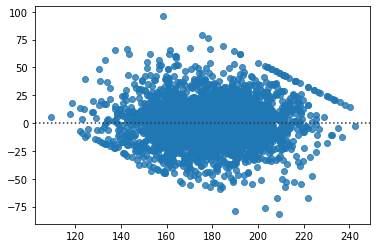

In [59]:
# 5. Check for Homoscadasity:

# from resid plot and het_goldfeldquandt test we can conclude about homoscadasity

inpc = sm.add_constant(inp_v10)

ypred = ols_mod.predict(inpc)

sns.residplot(ypred,ols_mod.resid)

In [60]:
# From the above residplot we can conclude that there is no clear conic pattern formation. so it is statisfying Homoscadasity.
# To confirm the above conclusion, het_goldfeldquandt mathematical test is used

In [61]:
from statsmodels.stats.api import het_goldfeldquandt

In [62]:
het_goldfeldquandt(ols_mod.resid, inp_v10)

(0.943917002339862, 0.8682898600703526, 'increasing')

In [63]:
# inference: Pvalue > 0.05. Null hypothesis holds good. Therefore model is homoscadasic

In [64]:
# All the 5 assumptions are statisfied.

In [65]:
# Feature Selection: Feature Selection can be done in three different methods:

# 1. Forward Selection
# 2. Backward Elimination
# 3. RFECV

In [66]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [67]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [68]:
# Forward Selection:

lr = LinearRegression()

lr_forward = sfs(estimator = lr, k_features = 'best', forward = True, scoring = 'r2')

sfs_forward = lr_forward.fit(inp_v10,out)

feat_forward = (sfs_forward.k_feature_names_)
feat_forward = list(feat_forward)

print(feat_forward)
print(sfs_forward.k_score_)

['avgAnnCount', 'incidenceRate', 'MedianAge', 'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPublicCoverageAlone', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']
0.46827910960117974


In [69]:
# Backward Elimination:

lr = LinearRegression()

lr_backward = sfs(estimator = lr, k_features = 'best', forward = False, scoring = 'r2')

sfs_backward = lr_backward.fit(inp_v10,out)

feat_backward = (sfs_backward.k_feature_names_)
feat_backward = list(feat_backward)

print(feat_backward)
print(sfs_backward.k_score_)

['avgAnnCount', 'incidenceRate', 'MedianAge', 'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPublicCoverageAlone', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']
0.46827910960117974


In [70]:
# RFE method:
from sklearn.feature_selection import RFECV

In [71]:
lr = LinearRegression()

rfecv = RFECV(estimator = lr)
rfe_mod = rfecv.fit(inp_v10,out)
rfe_mod.ranking_

array([6, 1, 9, 7, 8, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 5, 2, 1, 1, 1, 1])

In [72]:
rank = pd.DataFrame()
rank['Features'] = inp_v10.columns
rank['Rank'] = rfe_mod.ranking_
rank

,Features,Rank
0,avgAnnCount,6
1,incidenceRate,1
2,popEst2015,9
3,studyPerCap,7
4,binnedInc,8
5,MedianAge,1
6,AvgHouseholdSize,4
7,PctNoHS18_24,3
8,PctHS18_24,1
9,PctBachDeg18_24,1


In [73]:
feat_rfe = rank[rank['Rank'] == 1]['Features']
feat_rfe = list(feat_rfe)
feat_rfe

['incidenceRate',
 'MedianAge',
 'PctHS18_24',
 'PctBachDeg18_24',
 'PctHS25_Over',
 'PctEmployed16_Over',
 'PctUnemployed16_Over',
 'PctEmpPrivCoverage',
 'PctPublicCoverageAlone',
 'PctAsian',
 'PctOtherRace',
 'PctMarriedHouseholds',
 'BirthRate']

In [74]:
# Report Card:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [75]:
# from Forward Selection:
xtrain,xtest,ytrain,ytest = train_test_split(inp_v10,out,test_size = 0.3, random_state = 10)

lr = LinearRegression()
lr.fit(xtrain[feat_forward],ytrain)

ypred_train = lr.predict(xtrain[feat_forward])
ypred_test = lr.predict(xtest[feat_forward])

r2_train = r2_score(ytrain,ypred_train)
r2_test = r2_score(ytest,ypred_test)

mse_train = mean_squared_error(ytrain,ypred_train)
mse_test = mean_squared_error(ytest,ypred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

rse_forward = [r2_train,r2_test,rmse_train,rmse_test]
rse_forward

[0.4972768679311812, 0.4842012678698303, 19.05243360133083, 19.3479393263971]

In [76]:
# from Backward Elimination
xtrain,xtest,ytrain,ytest = train_test_split(inp_v10,out,test_size = 0.3, random_state = 10)

lr = LinearRegression()
lr.fit(xtrain[feat_backward],ytrain)

ypred_train = lr.predict(xtrain[feat_backward])
ypred_test = lr.predict(xtest[feat_backward])

r2_train = r2_score(ytrain,ypred_train)
r2_test = r2_score(ytest,ypred_test)

mse_train = mean_squared_error(ytrain,ypred_train)
mse_test = mean_squared_error(ytest,ypred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

rse_backward = [r2_train,r2_test,rmse_train,rmse_test]
rse_backward

[0.4972768679311812, 0.4842012678698303, 19.05243360133083, 19.3479393263971]

In [77]:
# from RFE
xtrain,xtest,ytrain,ytest = train_test_split(inp_v10,out,test_size = 0.3, random_state = 10)

lr = LinearRegression()
lr.fit(xtrain[feat_rfe],ytrain)

ypred_train = lr.predict(xtrain[feat_rfe])
ypred_test = lr.predict(xtest[feat_rfe])

r2_train = r2_score(ytrain,ypred_train)
r2_test = r2_score(ytest,ypred_test)

mse_train = mean_squared_error(ytrain,ypred_train)
mse_test = mean_squared_error(ytest,ypred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

rse_rfe = [r2_train,r2_test,rmse_train,rmse_test]
rse_rfe

[0.49324611283037734,
 0.48409761222466774,
 19.128660821756622,
 19.34988332340645]

In [78]:
scorecard = pd.DataFrame()
scorecard['Forward'] = rse_forward
scorecard['Backward'] = rse_backward
scorecard['RFE'] = rse_rfe
scorecard.index = ['r2_train','r2_test','rmse_train','rmse_test']
scorecard

,Forward,Backward,RFE
r2_train,0.497277,0.497277,0.493246
r2_test,0.484201,0.484201,0.484098
rmse_train,19.052434,19.052434,19.128661
rmse_test,19.347939,19.347939,19.349883


In [79]:
print((0.497277 -  0.484201),(0.493246 - 0.484098))

0.013076000000000032 0.009148000000000045


In [80]:
# inference: Difference between r2_train and r2_test is less for RFE 
#            when compared with Forward Selection and Backward Elimination.

# Difference between r2_train and r2_test is low.so it has low variance error

In [81]:
# Cross Validation:
from sklearn.model_selection import cross_val_score

In [82]:
lr = LinearRegression()

score = cross_val_score(lr, inp_v10,out,cv = 5,scoring = 'r2')
avg_score = np.mean(score)
var_error = np.std(score)
coeff_error = np.std(score) / np.mean(score)

print(avg_score,var_error,coeff_error)

0.4591850018250604 0.05238327997273492 0.11407881303730347


In [83]:
# From the above cross validation result we can conclude that the model has low variance error and high bias error.
# Model is having underfitting problem. To overcome this underfitting nature, R-square is to be increased. 
# To increase R-square we are using polynomial features.

In [84]:
from sklearn.preprocessing import PolynomialFeatures

In [85]:
pf = PolynomialFeatures(degree = 2, include_bias = False, interaction_only = True)

final_inp = inp_v10[feat_rfe]
inp_pf = pf.fit_transform(final_inp)
inp_pf = pd.DataFrame(inp_pf)
inp_pf.columns = pf.get_feature_names()
inp_pf.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x8 x9,x8 x10,x8 x11,x8 x12,x9 x10,x9 x11,x9 x12,x10 x11,x10 x12,x11 x12
0,42.066829,-1.821206,4.514505,0.750016,-11.629406,-2.308616,0.155464,0.413168,-5.212026,9.762530,...,-50.882563,4.480389,-8.536070,-2.298629,-8.392116,15.988723,4.305510,-1.407863,-0.379115,0.722293
1,-36.133171,-8.121206,-12.585495,1.350016,-8.829406,1.691384,-0.044536,2.413168,-3.912026,0.435969,...,-1.705524,-4.061653,22.868967,5.260547,0.452644,-2.548595,-0.586253,-6.069401,-1.396144,7.860929
2,-98.033171,3.878794,1.614505,3.350016,-5.829406,-8.308616,-0.844536,-6.286832,1.887974,-1.344365,...,-2.538126,0.083552,6.091654,-3.678376,-0.059494,-4.337670,2.619252,0.142790,-0.086222,-6.286363
3,-17.333171,1.678794,6.214505,-3.649984,-3.229406,-5.908616,4.255464,-6.186832,5.787974,-0.648904,...,-3.755842,-7.758550,-1.139057,-6.216089,0.869831,0.127703,0.696902,0.263799,1.439609,0.211354
4,-97.633171,7.178794,8.014505,-4.149984,-1.429406,-6.008616,-3.044536,-6.086832,3.487974,-1.144433,...,-3.991752,-7.711799,9.798236,3.902521,2.530305,-3.214882,-1.280449,-6.210937,-2.473742,3.143017


In [86]:
# Building model:

inpc = sm.add_constant(inp_pf)

ols = sm.OLS(out.values,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     38.88
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:26:33   Log-Likelihood:                -13155.
No. Observations:                3047   AIC:                         2.649e+04
Df Residuals:                    2955   BIC:                         2.705e+04
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        180.8091      0.584    309.770      0.000     179.665     181.954
x0             0.1770      0.008     22.431      0.000       0.161       0.192
x1            -0.7903      0.090     -8.819      0.000      -0.966      -0.615
x2             0.2664      0.053      5.050      0.000       0.163       0.370
x3            -0.1787      0.128     -1.396      0.163      -0.430       0.072
x4             0.8245      0.075     10.982      0.000       0.677       0.972
x5            -0.4126      0.090     -4.604      0.000      -0.588      -0.237
x6             0.8333      0.191      4.354      0.000       0.458       1.209
x7            -0.0739      0.076     -0.967      0.334      -0.224       0.076
x8             0.5835      0.126      4.633      0.000       0.337       0.830
x9            -0.2078      0.230     -0.905      0.366      -0.658       0.243
x10           -0.1998      0.109     -1.833      0.067      -0.414       0.014
x11           -0.3865      0.077     -5.038      0.000      -0.537      -0.236
x12           -0.4390      0.223     -1.967      0.049      -0.877      -0.001
x0 x1         -0.0017      0.001     -1.151      0.250      -0.005       0.001
x0 x2          0.0016      0.001      1.873      0.061   -7.64e-05       0.003
x0 x3          0.0008      0.002      0.406      0.685      -0.003       0.005
x0 x4         -0.0032      0.001     -2.191      0.029      -0.006      -0.000
x0 x5         -0.0045      0.001     -3.097      0.002      -0.007      -0.002
x0 x6         -0.0084      0.003     -2.797      0.005      -0.014      -0.003
x0 x7          0.0006      0.001      0.472      0.637      -0.002       0.003
x0 x8          0.0043      0.002      2.061      0.039       0.000       0.008
x0 x9         -0.0056      0.003     -1.756      0.079      -0.012       0.001
x0 x10         0.0037      0.002      2.259      0.024       0.000       0.007
x0 x11        -0.0003      0.001     -0.226      0.821      -0.003       0.002
x0 x12        -0.0003      0.003     -0.088      0.930      -0.007       0.006
x1 x2         -0.0008      0.009     -0.085      0.932      -0.018       0.017
x1 x3         -0.0941      0.021     -4.404      0.000      -0.136      -0.052
x1 x4         -0.0017      0.014     -0.121      0.904      -0.029       0.025
x1 x5          0.0123      0.015      0.831      0.406      -0.017       0.041
x1 x6          0.0197      0.029      0.670      0.503      -0.038       0.077
x1 x7         -0.0023      0.012     -0.197      0.844      -0.025       0.021
x1 x8         -0.0415      0.020     -2.045      0.041      -0.081      -0.002
x1 x9         -0.0299      0.029     -1.033      0.302      -0.087       0.027
x1 x10         0.0293      0.014      2.041      0.041       0.001       0.058
x1 x11        -0.0222      0.014     -1.570      0.116      -0.050       0.006
x1

In [87]:
# To remove all unwanted features:

lr = LinearRegression()

lr_forward = sfs(estimator = lr, k_features = 'best', forward = True, scoring = 'r2')

sfs_forward = lr_forward.fit(inp_pf,out)

feat_forward = (sfs_forward.k_feature_names_)
feat_forward = list(feat_forward)

print(feat_forward)

['x0', 'x1', 'x2', 'x4', 'x5', 'x6', 'x8', 'x10', 'x11', 'x12', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x8', 'x0 x9', 'x1 x2', 'x1 x3', 'x1 x8', 'x1 x10', 'x1 x12', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x11', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x12', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x9', 'x4 x10', 'x4 x11', 'x5 x8', 'x5 x9', 'x6 x7', 'x6 x9', 'x6 x10', 'x7 x8', 'x7 x9', 'x7 x10', 'x8 x9', 'x8 x10', 'x8 x12', 'x9 x10', 'x9 x11', 'x9 x12', 'x10 x11', 'x11 x12']


In [91]:
# Building model with selected features:

inp = inp_pf[['x0', 'x1', 'x2', 'x4', 'x5', 'x6', 'x8', 'x10', 'x11', 'x12', 'x0 x1', 
              'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x8', 'x0 x9', 'x1 x2', 'x1 x3', 'x1 x8', 
              'x1 x10', 'x1 x12', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x11', 'x3 x5', 
              'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x12', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x9', 'x4 x10', 
              'x4 x11', 'x5 x8', 'x5 x9', 'x6 x7', 'x6 x9', 'x6 x10', 'x7 x8', 'x7 x9', 'x7 x10', 'x8 x9', 'x8 x10', 'x8 x12',
              'x9 x10', 'x9 x11', 'x9 x12', 'x10 x11', 'x11 x12']]
inpc = sm.add_constant(inp)

ols = sm.OLS(out.values,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     59.51
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:36:42   Log-Likelihood:                -13170.
No. Observations:                3047   AIC:                         2.646e+04
Df Residuals:                    2987   BIC:                         2.682e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        181.0039      0.499    363.054      0.000     180.026     181.981
x0             0.1734      0.007     23.329      0.000       0.159       0.188
x1            -0.7620      0.074    -10.326      0.000      -0.907      -0.617
x2             0.2909      0.050      5.820      0.000       0.193       0.389
x4             0.8133      0.068     11.878      0.000       0.679       0.948
x5            -0.4870      0.076     -6.409      0.000      -0.636      -0.338
x6             0.7847      0.181      4.331      0.000       0.429       1.140
x8             0.6708      0.105      6.370      0.000       0.464       0.877
x10           -0.2554      0.102     -2.492      0.013      -0.456      -0.054
x11           -0.3539      0.072     -4.903      0.000      -0.495      -0.212
x12           -0.2746      0.196     -1.402      0.161      -0.658       0.109
x0 x1         -0.0019      0.001     -1.577      0.115      -0.004       0.000
x0 x2          0.0019      0.001      2.281      0.023       0.000       0.004
x0 x3         -0.0004      0.002     -0.190      0.849      -0.004       0.003
x0 x4         -0.0038      0.001     -2.906      0.004      -0.006      -0.001
x0 x5         -0.0038      0.001     -2.923      0.003      -0.006      -0.001
x0 x6         -0.0085      0.003     -3.075      0.002      -0.014      -0.003
x0 x8          0.0047      0.002      2.676      0.007       0.001       0.008
x0 x9         -0.0047      0.003     -1.591      0.112      -0.011       0.001
x1 x2         -0.0045      0.008     -0.583      0.560      -0.020       0.011
x1 x3         -0.0936      0.019     -4.856      0.000      -0.131      -0.056
x1 x8         -0.0334      0.012     -2.692      0.007      -0.058      -0.009
x1 x10         0.0317      0.013      2.472      0.013       0.007       0.057
x1 x12         0.0326      0.027      1.212      0.226      -0.020       0.085
x2 x4         -0.0178      0.007     -2.421      0.016      -0.032      -0.003
x2 x5         -0.0254      0.008     -3.049      0.002      -0.042      -0.009
x2 x6         -0.0388      0.017     -2.269      0.023      -0.072      -0.005
x2 x7          0.0124      0.008      1.573      0.116      -0.003       0.028
x2 x8         -0.0190      0.012     -1.535      0.125      -0.043       0.005
x2 x9         -0.0059      0.021     -0.285      0.776      -0.047       0.035
x2 x11        -0.0305      0.008     -3.711      0.000      -0.047      -0.014
x3 x5         -0.0288      0.018     -1.560      0.119      -0.065       0.007
x3 x6          0.0486      0.040      1.205      0.228      -0.030       0.128
x3 x7         -0.0082      0.016     -0.503      0.615      -0.040       0.024
x3 x8         -0.0767      0.027     -2.805      0.005      -0.130      -0.023
x3 x9          0.0029      0.031      0.092      0.927      -0.059       0.064
x3

In [92]:
# checking multicollinearity:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inp.values,i) for i in range(inp.shape[1])]
vif['feature']=inp.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
49,7.981317,x7 x9
44,7.266258,x5 x9
48,6.608165,x7 x8
33,6.580017,x3 x8
40,6.235042,x4 x9
32,6.201184,x3 x7
51,5.636171,x8 x9
30,5.528493,x3 x5
37,5.199052,x4 x5
39,5.016543,x4 x7


In [93]:
# In the above dataframe, "x7 x9" has value > 5. so we can drop and recheck vif.

In [94]:
inpv1 = inp.drop('x7 x9',axis = 1)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inpv1.values,i) for i in range(inpv1.shape[1])]
vif['feature']=inpv1.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
33,6.546821,x3 x8
48,6.545049,x7 x8
32,6.153684,x3 x7
40,6.062600,x4 x9
30,5.517653,x3 x5
44,5.093451,x5 x9
37,5.083457,x4 x5
50,5.024693,x8 x9
43,4.953138,x5 x8
34,4.713918,x3 x9


In [93]:
# In the above dataframe, "x3 x8" has value > 5. so we can drop and recheck vif.

In [95]:
inpv2 = inpv1.drop('x3 x8',axis = 1)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inpv2.values,i) for i in range(inpv2.shape[1])]
vif['feature']=inpv2.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
47,6.481684,x7 x8
39,6.050931,x4 x9
36,5.064761,x4 x5
30,4.992447,x3 x5
43,4.969185,x5 x9
42,4.931133,x5 x8
32,4.892500,x3 x7
33,4.713899,x3 x9
49,4.687710,x8 x9
38,4.612675,x4 x7


In [93]:
# In the above dataframe, "x7 x8" has value > 5. so we can drop and recheck vif.

In [97]:
inpv3 = inpv2.drop('x7 x8',axis = 1)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inpv3.values,i) for i in range(inpv3.shape[1])]
vif['feature']=inpv3.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
39,6.025567,x4 x9
36,4.998609,x4 x5
30,4.964136,x3 x5
43,4.958056,x5 x9
33,4.712818,x3 x9
48,4.647056,x8 x9
32,4.624198,x3 x7
38,4.436005,x4 x7
49,4.392682,x8 x10
27,4.208600,x2 x8


In [93]:
# In the above dataframe, "x4 x9" has value > 5. so we can drop and recheck vif.

In [100]:
inpv4 = inpv3.drop('x4 x9',axis = 1)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inpv4.values,i) for i in range(inpv4.shape[1])]
vif['feature']=inpv4.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
36,4.980717,x4 x5
30,4.960802,x3 x5
42,4.710273,x5 x9
32,4.609705,x3 x7
33,4.463145,x3 x9
48,4.358131,x8 x10
38,4.341090,x4 x7
27,4.175242,x2 x8
46,3.970835,x7 x10
26,3.893691,x2 x7


In [93]:
# In the above dataframe, all the value of vif < 5. so we can build and model and check for R-square

In [101]:
# building model with all input features from last VIF.

inpc = sm.add_constant(inpv4)

ols = sm.OLS(out.values,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     63.06
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:05:34   Log-Likelihood:                -13181.
No. Observations:                3047   AIC:                         2.647e+04
Df Residuals:                    2991   BIC:                         2.681e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        180.8339      0.488    370.209      0.000     179.876     181.792
x0             0.1724      0.007     23.213      0.000       0.158       0.187
x1            -0.7664      0.073    -10.460      0.000      -0.910      -0.623
x2             0.3081      0.050      6.201      0.000       0.211       0.406
x4             0.8015      0.069     11.695      0.000       0.667       0.936
x5            -0.4915      0.076     -6.507      0.000      -0.640      -0.343
x6             0.7311      0.180      4.055      0.000       0.378       1.085
x8             0.7266      0.103      7.085      0.000       0.526       0.928
x10           -0.2413      0.102     -2.370      0.018      -0.441      -0.042
x11           -0.3557      0.072     -4.933      0.000      -0.497      -0.214
x12           -0.2324      0.195     -1.191      0.234      -0.615       0.150
x0 x1         -0.0022      0.001     -1.753      0.080      -0.005       0.000
x0 x2          0.0018      0.001      2.160      0.031       0.000       0.003
x0 x3         -0.0016      0.002     -0.836      0.403      -0.005       0.002
x0 x4         -0.0038      0.001     -2.913      0.004      -0.006      -0.001
x0 x5         -0.0040      0.001     -3.089      0.002      -0.007      -0.001
x0 x6         -0.0082      0.003     -2.958      0.003      -0.014      -0.003
x0 x8          0.0039      0.002      2.256      0.024       0.001       0.007
x0 x9         -0.0054      0.003     -1.945      0.052      -0.011    4.45e-05
x1 x2         -0.0013      0.008     -0.164      0.869      -0.016       0.014
x1 x3         -0.0710      0.018     -3.871      0.000      -0.107      -0.035
x1 x8         -0.0314      0.012     -2.543      0.011      -0.056      -0.007
x1 x10         0.0324      0.013      2.524      0.012       0.007       0.058
x1 x12         0.0316      0.027      1.172      0.241      -0.021       0.085
x2 x4         -0.0184      0.007     -2.520      0.012      -0.033      -0.004
x2 x5         -0.0244      0.008     -2.937      0.003      -0.041      -0.008
x2 x6         -0.0458      0.017     -2.686      0.007      -0.079      -0.012
x2 x7          0.0145      0.008      1.880      0.060      -0.001       0.030
x2 x8         -0.0064      0.012     -0.543      0.587      -0.029       0.017
x2 x9          0.0180      0.019      0.948      0.343      -0.019       0.055
x2 x11        -0.0269      0.008     -3.281      0.001      -0.043      -0.011
x3 x5         -0.0105      0.017     -0.600      0.548      -0.045       0.024
x3 x6          0.0293      0.038      0.780      0.435      -0.044       0.103
x3 x7          0.0173      0.014      1.234      0.217      -0.010       0.045
x3 x9         -0.0263      0.030     -0.875      0.382      -0.085       0.033
x3 x10        -0.0491      0.019     -2.630      0.009      -0.086      -0.013
x3

In [ ]:
# Inference: From the above build model we can conclude that performance of the OLS model was increased and result was seen from
#            increased R-square.

# Overall Performance of the model was 53.7%